In [109]:
using JSON
using Plots
using DataFrames
using StatPlots
using Gadfly
pyplot()

INFO: Recompiling stale cache file /Users/lucas/.julia/lib/v0.5/Gadfly.ji for module Gadfly.


Plots.PyPlotBackend()

In [84]:
p = 1;
q = 8;
EXjsons = [];
GAjsons = [];

In [85]:
for i = p:q
    EXjson = JSON.parse(readstring(string("benchmark_exato_", i, ".json")))
    GAjson = JSON.parse(readstring(string("benchmark_ga_", i, ".json")))
    if EXjson["clique_size"] > 0 && EXjson["n_nodes"] == GAjson["n_nodes"]
        push!(EXjsons, EXjson)
        push!(GAjsons, GAjson)
    end
end
for i = p:q-1
    print(GAjsons[i]["n_nodes"], " - ", EXjsons[i]["n_nodes"], "\n")
end   

In [98]:

EXjsons = [JSON.parse(readstring(string("benchmark_exato_", i, ".json"))) for i in p:q];
GAjsons = [JSON.parse(readstring(string("benchmark_ga_", i, ".json"))) for i in p:q];

df = DataFrame(Vertices = [x["n_nodes"] for x in EXjsons], Densidade = [x["density"] for x in EXjsons], 
EX_runtime = [x["run_time"] for x in EXjsons], GA_runtime = [x["run_time"] for x in GAjsons], 
EX_cliquesize = [x["clique_size"] for x in EXjsons], GA_cliquesize = [x["clique_size"] for x in GAjsons])

,n_nodes,density,EX_runtime,GA_runtime,EX_cliquesize,GA_cliquesize
1,10,0.17778,334397,110061018,2,2
2,10,0.48889,1262317,286231877,4,2
3,10,0.97778,10538501,1428786580,8,8
4,17,0.25735,20166451,2848133863,3,0
5,17,0.41912,259111262,4109326960,4,0
6,17,0.77941,2447759121,17161084958,9,0
7,24,0.26449,783177733,9195922544,4,0
8,24,0.6558,755678116777,11663706141,0,0



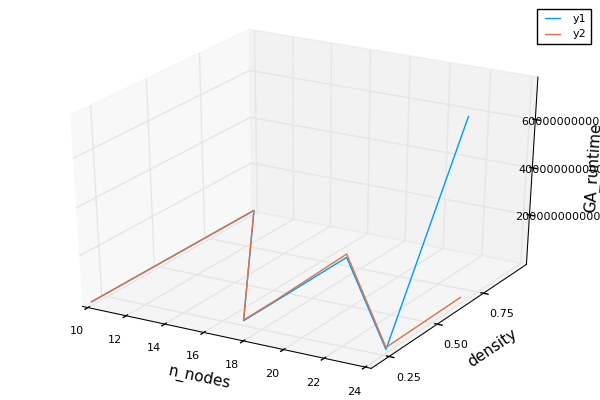

In [104]:
plot(df, :n_nodes, :density, :EX_runtime)
plot!(df, :n_nodes, :density, :GA_runtime)


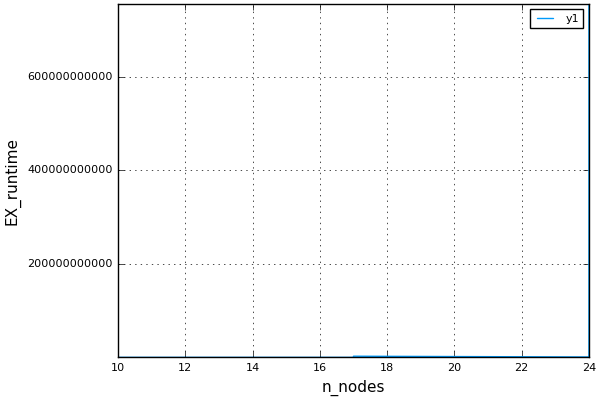

In [111]:
plot(df, :n_nodes, :EX_runtime)


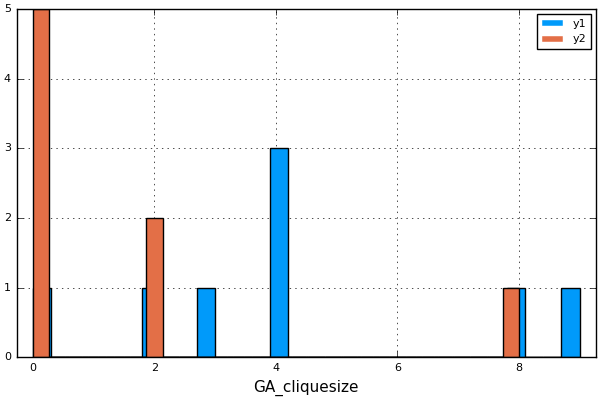

In [108]:
histogram(df, :EX_cliquesize)
histogram!(df, :GA_cliquesize)